In [23]:
import pickle
from Sample import Sample
import matplotlib.pyplot as plt
import numpy as np
import math

import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# %matplotlib inline


# Pickle functions
def pickle_sample(self, path):
    sample_pickle = open(f"{path}/{f.get_param('ID')}_pickle.pickle", "wb")
    pickle.dump(self, sample_pickle)
    sample_pickle.close()

def unpickle_sample(path):
    sample_pickle =open(path, "rb")
    self = pickle.load(sample_pickle)
    sample_pickle.close()
    return self


def df2arr(df):
    # convert Series or DataFrame into numpy array
    return np.array(df.tolist())

#colormap
color_map = sns.color_palette("hls",24)

In [13]:
f: Sample= unpickle_sample("tests/f3/20220426_RM0008_130hpf_fP1_f3_pickle.pickle")
#f: Sample= unpickle_sample("tests/f2/20220511_RM0008_126hpf_fP10_f2_pickle.pickle")
print(f)
f.neuron.head()

20220426_RM0008_130hpf_fP1_f3


,raw_traces,roi_exp_tag,roi_exp_position,roi_exp_plane,dig_err,df_traces,baseline_mean,baseline_std,threshold
0,"[[8151.852287334587, 8139.384996155328, 8146.5...",1,"[[248.39333273428446, 23.656695120468214], [24...",1,"[8125.39128494535, 8125.673898850642, 8125.496...","[[0.2850663644118177, -0.4318500959225006, 0.0...","[1.0515398076092553e-14, -8.075154301847998e-1...","[0.1399443331057725, 0.24533606158726529, 0.23...","[0.28385644679582944, 0.43460857647122364, 0.4..."
1,"[[8150.588368, 8141.56034757653, 8147.49930245...",2,"[[217.2940734750252, 22.684235481341915], [217...",1,"[8125.595642432204, 8125.650960049199, 8125.52...","[[0.33800040927640673, -0.21090570893409777, 0...","[-3.013726834226526e-14, 3.222818837197597e-14...","[0.1664291690968692, 0.1999996879086681, 0.198...","[0.31308570531550256, 0.4173934086045752, 0.40..."
2,"[[8143.418429876282, 8146.324965373964, 8156.2...",4,"[[238.5325919935437, 47.48195627906273], [238....",1,"[8125.510102570438, 8125.684383656509, 8125.54...","[[-0.144155094977842, -0.07005785534073403, 0....","[3.725591264063561e-14, 5.852461372666897e-15,...","[0.18182708743921594, 0.26407697871995417, 0.2...","[0.361959249882342, 0.46823576793336885, 0.572..."
3,"[[8137.314164848965, 8138.394619617433, 8136.4...",6,"[[265.4599994009511, 66.93114906158883], [265....",1,"[8125.514787120848, 8125.766966547295, 8125.28...","[[-0.5309256870121831, -0.500543946662474, -0....","[2.926759363964222e-14, -5.1361031829682834e-1...","[0.2021500700617236, 0.1819669822931774, 0.179...","[0.503525049755647, 0.46178480560475127, 0.397..."
4,"[[8150.62774839593, 8137.712214532874, 8145.60...",7,"[[237.26964031695442, 70.98102058510915], [237...",1,"[8125.57542810402, 8125.632936233318, 8125.626...","[[0.2819484336576625, -0.26949779202580054, 0....","[-4.210190397371672e-14, 3.142459837319967e-14...","[0.20113430962921483, 0.24510494830613533, 0.2...","[0.3444276397273836, 0.47638708678156066, 0.36..."


In [21]:
n1 = f.get_traces(n_ID=[1], trace="df", trials=[1], odors=[1]).squeeze()
n2 = f.get_traces(n_ID=[2], trace="df", trials=[1], odors=[1]).squeeze()

In [24]:
from sklearn.metrics import mutual_info_score

def compute_mutual_information(neuron1, neuron2):
    return mutual_info_score(neuron1, neuron2)

In [25]:
mi = compute_mutual_information(n1,n2)

C:\Users\montruth\Anaconda3\envs\pr\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


In [26]:
print(mi)

5.923229241007425


In [41]:
import numpy as np

def create_distance_matrix(data):
    # get the number of neurons
    n_neurons = data.shape[0]

    # initialize the distance matrix with zeros
    distance_matrix = np.zeros((n_neurons, n_neurons))

    # flatten the data along the frames and trials dimensions for each neuron
    flattened_data = data.reshape(n_neurons, -1)

    # compute the mutual information for each pair of neurons
    for i in range(n_neurons):
        for j in range(i, n_neurons):  # we can start from i as the matrix is symmetric
            mutual_info = compute_mutual_information(flattened_data[i], flattened_data[j])
            distance_matrix[i, j] = mutual_info
            distance_matrix[j, i] = mutual_info  # mirror the value because of symmetry

    # convert mutual info to distances by subtracting from max mutual info
    distance_matrix = np.max(distance_matrix) - distance_matrix

    return distance_matrix

In [42]:
import time

start = time.time()
data = f.get_traces(n_ID=[x for x in range(30)],trace="df")
distance_matrix = create_distance_matrix(data)
end = time.time()
print(end - start)


C:\Users\montruth\Anaconda3\envs\pr\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\montruth\Anaconda3\envs\pr\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\montruth\Anaconda3\envs\pr\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\montruth\Anaconda3\envs\pr\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous valu

In [43]:
from sklearn.cluster import AgglomerativeClustering

def perform_clustering(distance_matrix, n_clusters):
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
    labels = clustering_model.fit_predict(distance_matrix)

    return labels

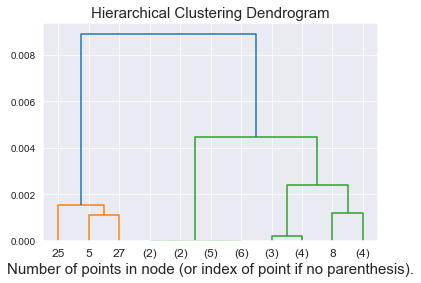

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(distance_matrix)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()